## №1
Решить задачу Коши с правой частью, задаваемой функцией на временном отрезке $\texttt{[0; 0.75]}$ при начальном значении $\texttt{u0 = [1; 1]}$ с помощью явной схемы Рунге-Кутта второго порядка типа предиктор-корректор, задаваемой матрицей Бутчера $\mathbf{A}$ и векторами $\mathbf{a}$ и $\mathbf{b}$ (см. предыдущий семинар)
\begin{equation} \nonumber
	\mathbf{A} = 
		\begin{pmatrix}
		0 & 0 \\
		1/2 & 0 \\
		\end{pmatrix},
	\qquad
	\mathbf{a} = 
		\begin{pmatrix}
		0 \\
		1/2 \\
		\end{pmatrix},
	\qquad
	\mathbf{b} = 
		\begin{pmatrix}
		0 \\
		1 \\
		\end{pmatrix}^T.
\end{equation}

In [5]:
def explicit_rk(F, u0, t, A, b, c):
   
    try:
        if np.shape(A)[0] != np.shape(A)[1] != len(b) != len(c):
            raise IndexError()
            
            
        dim = len(u0)
        Y = np.zeros(( len(t), dim) )
        Y[0,:] = u0
        s = len(b)

        tau = 0
        t_prev = t[0]
        
        for tt in t[1:]:
            
            dt = tt - t_prev
                        
            W = np.zeros((s, dim))
            W[0, :] = F(tt, Y[tau])
            
            for ss in range(1, s):
                W[ss, :] = F( tt + dt*c[ss] , Y[tau] + dt*np.dot( A[ss][:ss], W[:ss] ) ) 
          
            Y[tau + 1, :] =  Y[tau] + dt * np.dot( b, W )
            
            tau += 1
            t_prev = tt
        
        
        return Y
            
        
    except IndexError:
        print('Check arrays dimension\n', traceback.format_exc())
        return None    

In [6]:
import numpy as np
import matplotlib.pyplot as plt

A = [[0, 0],[1/2, 0]]
a = [0, 1/2]
b = [0, 1]

def task_1(t, u):
    return [-50*(u[0]-np.cos(t)) + 10*u[1], 1.2*u[0] - u[1]*u[0]]

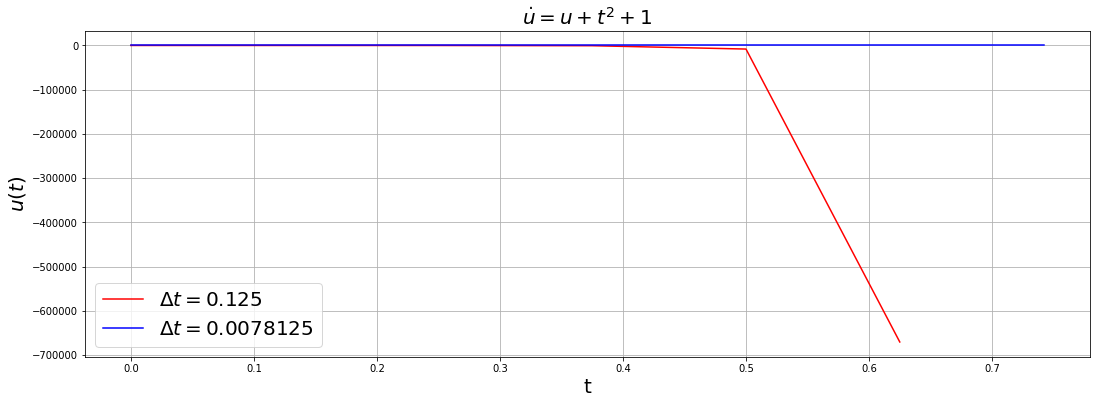

In [7]:
t = np.linspace(0, 0.75, 100, endpoint=True)
delta_t = [1/8, 1/128]
t = [ np.arange(0, 0.75, tau) for tau in delta_t ]
u0 = [1,1]

rk = [explicit_rk(task_1, u0, tt, A, b, a) for tt in t]

plt.figure(figsize=(18, 6))
    
plt.plot(t[0], rk[0][:,0], 'r', label = r'$\Delta t = $' + str(delta_t[0])  )
plt.plot(t[1], rk[1][:,0], 'b', label = r'$\Delta t = $' + str(delta_t[1])  )

plt.grid()
plt.xlabel('t', fontsize = 20)
plt.ylabel(r'$u(t)$', fontsize = 20)
plt.legend(loc = 'best', fontsize=20)

plt.title( r'$\dot{u} = u + t^2 + 1 $', fontsize=20)
plt.show()

### №2
Реализовать семейство одностадийных схем Розенброка в общем виде

In [15]:
def jacobian_f(f, t, u, h):
    
    dim = len(u)
    
    J = np.zeros((dim, dim))
    du = np.eye(dim) * h
    
    for d in range(dim):
        J[d,:] = [(f(t, u + du[dd])[d] - f(t,u - du[dd])[d])/2/h for dd in range(dim)]
        
    return J


def rosenbrock_method(fun, u0, t, a):
        
    dim = len(u0)
    Y = np.zeros(( len(t), dim) )
    Y[0,:] = u0
    
    h = 1e-5
    
    for i in range(len(t) - 1):
                
        dt = t[i+1] - t[i]
        D = np.eye(dim) - a * dt * jacobian_f(fun, t[i], Y[i], h)
        F = fun(t[i] + dt/2, Y[i])
        W = np.linalg.solve(D,F)            
        
        Y[i+1, :] = Y[i] + dt * np.real(W)
                                   
    return Y

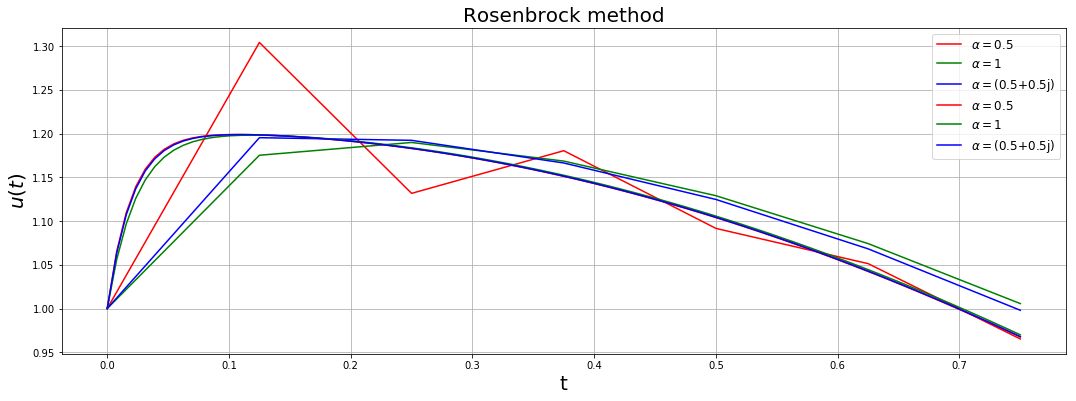

In [19]:
dt = [1/8, 1/128]

N = [ round(0.75/ddt + 1) for ddt in dt ]

t = [ np.linspace(0, 0.75, n) for n in N ]

u0 = [1,1]
a = [0.5, 1, (1+1j)/2]

rk = np.array([[rosenbrock_method(task_1, u0, tt, aa) for aa in a] for tt in t])


c = ['r','g','b']

plt.figure(figsize=(18, 6))

for i in range(len(t)):
        
    for j in range(len(a)):
        plt.plot(t[i], rk[i][j][:,0], color = c[j], label =  r'$\alpha = $' + str(a[j]))
        #plt.plot(t[i], rk[i][j][:,1], color = 'm', label =  r'$\dot{u} $')

    
plt.xlabel('t', fontsize = 20)
plt.ylabel(r'$u(t)$', fontsize = 20)
plt.legend(loc = 'best', fontsize = 12)
plt.title( 'Rosenbrock method' , fontsize=20)
plt.grid()

plt.show()